# Analyze Audio Features on Song Level

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

from settings import collection_path, collection_cols, collection_genres, feature_list
from load import load_collection
from load_songs import create_songs_data

# my own custom functions
import EDA_functions as EDA

# visualization
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use(['default', 'raph-base'])
import seaborn as sns

In [2]:
# collection = load_collection(collection_path, collection_cols, collection_genres)

In [3]:
# song_data = create_songs_data(collection, feature_list)

Dismember - Pieces NOT FOUND on Spotify
Dismember - Skin Her Alive NOT FOUND on Spotify
Dismember - Like An Everflowing Stream NOT FOUND on Spotify
Dismember - Where Ironcrosses Flow NOT FOUND on Spotify
Hypocrisy - Too Drunk To Fuck NOT FOUND on Spotify
Dismember - Indicent & Obscene NOT FOUND on Spotify
retrying ...3secs
Fatalist - The Dephts Of Inhumanity NOT FOUND on Spotify
Skeletal Remains - Beyond The Flesh NOT FOUND on Spotify
Insurgency - No Worlds … Nor Gods Beyond NOT FOUND on Spotify
retrying ...5secs
Cianide - Unhumanized NOT FOUND on Spotify


In [2]:
# # Save to csv
# song_data.to_csv("data/interim/song_data.csv", index=False)
# Load from csv
song_data = pd.read_csv("data/interim/song_data.csv")

In [3]:
# Check
song_data.head(20)

,Artist,Album,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms
0,Merciless,The Awakening,0.2390,0.935,9,0,0.041700,0.302,147.819,-5.080,208440
1,Merciless,The Awakening,0.1870,0.922,9,0,0.757000,0.218,155.172,-5.305,179333
2,Merciless,The Awakening,0.2280,0.900,9,1,0.098800,0.303,148.102,-4.470,190800
3,Merciless,The Awakening,0.1870,0.924,0,1,0.246000,0.220,151.299,-4.843,167267
4,Merciless,The Awakening,0.2150,0.917,5,1,0.644000,0.388,84.102,-4.791,232200
5,Merciless,The Awakening,0.2170,0.946,4,1,0.253000,0.340,90.403,-4.588,403827
6,Merciless,The Awakening,0.2410,0.943,9,1,0.527000,0.210,144.991,-5.644,241107
7,Merciless,The Awakening,0.2180,0.972,11,1,0.742000,0.292,159.973,-5.873,140133
8,Merciless,The Awakening,0.2230,0.976,9,0,0.034000,0.172,156.127,-5.980,189760
9,Merciless,The Awakening,0.3420,0.963,4,1,0.487000,0.192,102.901,-6.723,146707


In [4]:
song_data[["Artist", "Album"]].nunique()

Artist    62
Album     89
dtype: int64

---
## EDA

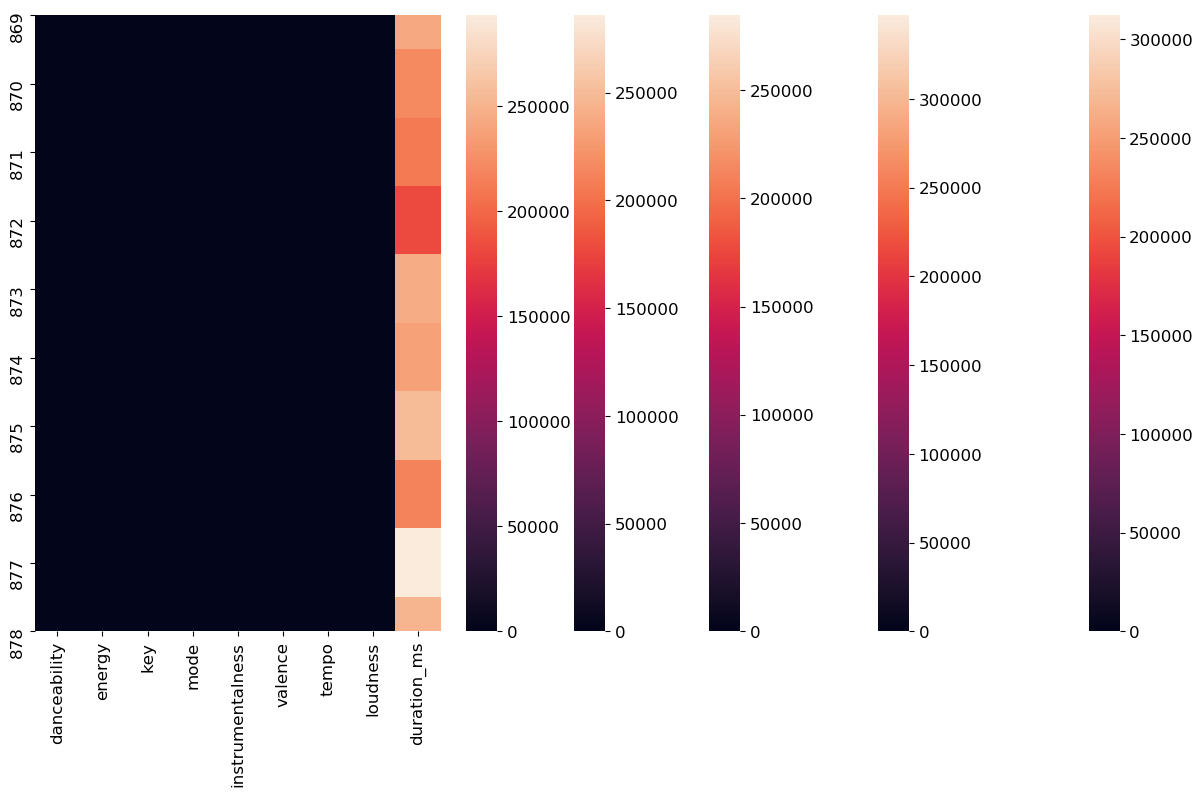

In [16]:
cc = song_data.loc[song_data["Artist"] == "Cannibal Corpse "]
for album in cc["Album"].unique():
    sns.heatmap((cc.loc[cc["Album"] == album].iloc[:, 2:]))

In [18]:
cc.loc[cc["Album"] == album].style.background_gradient(cmap='viridis')

,Artist,Album,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms
869,Cannibal Corpse,Tomb Of The Mutilated,0.357,0.98,6,1,0.843,0.368,96.969,-6.835,242760
870,Cannibal Corpse,Tomb Of The Mutilated,0.338,0.988,8,0,0.833,0.449,99.046,-7.29,221960
871,Cannibal Corpse,Tomb Of The Mutilated,0.244,0.987,8,0,0.779,0.247,142.341,-7.661,211373
872,Cannibal Corpse,Tomb Of The Mutilated,0.297,0.993,9,1,0.77,0.178,127.693,-7.173,182427
873,Cannibal Corpse,Tomb Of The Mutilated,0.266,0.986,8,0,0.747,0.302,86.179,-8.346,245773
874,Cannibal Corpse,Tomb Of The Mutilated,0.247,0.992,8,0,0.799,0.318,142.891,-7.766,237093
875,Cannibal Corpse,Tomb Of The Mutilated,0.346,0.994,10,0,0.834,0.238,99.419,-7.352,255800
876,Cannibal Corpse,Tomb Of The Mutilated,0.234,0.993,11,1,0.741,0.204,145.524,-8.713,217040
877,Cannibal Corpse,Tomb Of The Mutilated,0.295,0.987,8,0,0.788,0.206,117.873,-7.984,293160
878,Cannibal Corpse,Tomb Of The Mutilated,0.135,0.951,11,1,0.601,0.202,89.321,-8.746,251680


In [21]:
album = "Red Before Black"
cc.loc[cc["Album"] == album].style.background_gradient(cmap='viridis')

,Artist,Album,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms
850,Cannibal Corpse,Red Before Black,0.24,0.981,8,1,0.922,0.217,189.803,-5.181,204320
851,Cannibal Corpse,Red Before Black,0.368,0.994,6,1,0.821,0.129,98.024,-5.19,192227
852,Cannibal Corpse,Red Before Black,0.225,0.98,6,1,0.86,0.105,115.077,-5.626,285907
853,Cannibal Corpse,Red Before Black,0.325,0.992,8,1,0.886,0.0912,100.696,-5.167,208947
854,Cannibal Corpse,Red Before Black,0.395,0.998,2,1,0.908,0.0397,110.036,-5.354,253667
855,Cannibal Corpse,Red Before Black,0.141,0.992,1,1,0.865,0.0699,159.989,-5.413,223067
856,Cannibal Corpse,Red Before Black,0.385,0.974,1,1,0.863,0.299,96.021,-5.184,217120
857,Cannibal Corpse,Red Before Black,0.139,0.968,9,0,0.884,0.208,180.246,-5.594,209360
858,Cannibal Corpse,Red Before Black,0.324,0.972,1,1,0.889,0.356,176.141,-5.845,273067
859,Cannibal Corpse,Red Before Black,0.376,0.984,2,1,0.882,0.112,104.074,-4.916,205960


In [20]:
album

'Tomb Of The Mutilated'

In [23]:
def count_outliers_IQR_method(df, outlier_cols=None, IQR_dist=1.5):
    """Display outlier count in specified columns depending on distance
    from 1th / 3rd quartile. NaN are ignored.

    Arguments:
    ----------
    - df: DataFrame
    - outlier_cols: List with columns to clean, (default=all num columns)
    - IQR_dist: Float for cut-off distance from quartiles, (default=1.5)

    Returns:
    --------
    - None, print cols with outliers
    """

    outlier_cols = outlier_cols if outlier_cols is not None else \
        list(df.select_dtypes(include=['float64', 'int64']).columns)
    for col in outlier_cols:
        q25, q75 = np.nanpercentile(df[col], 25), np.nanpercentile(df[col], 75)
        iqr = q75 - q25
        # calculate the outlier cut-off
        cut_off = iqr * IQR_dist
        lower, upper = q25 - cut_off, q75 + cut_off
        # identify outliers
        outliers = [x for x in df[col] if x < lower or x > upper]
        if len(outliers) > 0:
            print(col + '\nIdentified outliers: {}'.format(len(outliers)))
            print('Percentage of total: {:.1f}%\n'.format(
                  (len(outliers)/len(df[col]))*100))

In [27]:
count_outliers_IQR_method(cc.loc[cc["Album"] == "Tomb Of The Mutilated"])

energy
Identified outliers: 1
Percentage of total: 10.0%

instrumentalness
Identified outliers: 1
Percentage of total: 10.0%



In [ ]:
count_outliers_IQR_method(cc.loc[cc["Album"] == album])

In [32]:
count_outliers_IQR_method(song_data.loc[(song_data["Album"] == "Tropical Sun") & (song_data["Artist"] == "Fulci")])

danceability
Identified outliers: 3
Percentage of total: 21.4%

instrumentalness
Identified outliers: 1
Percentage of total: 7.1%

valence
Identified outliers: 5
Percentage of total: 35.7%

loudness
Identified outliers: 3
Percentage of total: 21.4%

